## **TASK :**
Here, We are given with a **Training DataSet csv file**(with X_train and Y_train) and a **Testing DataSet csv file**(with X_test). The task is to :

1. **Code Gradient Descent for N features** and come up with predictions for the Testing DataSet.
2. Try and test with **various combinations of Learning Rates and Number of Iterations**.
3. Try using **Feature Scaling**, and see if it helps in getting better results or not. 

## **UNDERSTANDING THE DATASET :**
> ### ⭐ **COMBINED CYCLE POWER PLANT DATASET :**
Combined Cycle Power Plant dataset contains **9568 data points** collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables **Temperature (T)**, **Ambient Pressure (AP)**, **Relative Humidity (RH)** and **Exhaust Vacuum (V)** to predict the **net hourly electrical energy output (EP)** of the plant.                                                                                                                  
A **combined cycle power plant (CCPP)** is composed of **gas turbines (GT)**, **steam turbines (ST)** and **heat recovery steam generators**. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, the other three of the ambient variables affect the GT performance.                                                  
For comparability with our baseline studies, and to allow 5x2 fold statistical tests be carried out, we provide the data shuffled five times. For each shuffling 2-fold CV is carried out and the resulting 10 measurements are used for statistical testing.


![alt text](https://www.ge.com/content/dam/gepower-pgdp/global/en_US/images/product/gas%20turbines/CC%20360%20hero.jpg)

## **IMPORTING ALL THE REQUIRED MODULES/LIBRARIES :**

In [1]:
import pandas as pd                                   # For Data Loading, Cleaning, Analysis and Manipulation.
import numpy as np                                    # For Mathematical Calculations and Equation Solving.

from sklearn import preprocessing                     # For Feature Scaling.
from sklearn import model_selection                   # For train_test_split().
from sklearn.linear_model import LinearRegression     # For sklearn's LinearRegression. 

# For Data Visualization :
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **LOADING THE DATASET :**

In [2]:
filePath = '/content/drive/My Drive/ML STUFF/PROJECTS/CCPP/ccpp_train.csv'
training_data = pd.read_csv(filePath)         # Loading the csv file into a pandas DataFrame.

df = training_data.copy()
df.columns = ['T', 'V', 'AP', 'RH', 'EP']     # Renaming the Column Headers.
df.head()                                     # Looking at the first 5 entries.

,T,V,AP,RH,EP
0,8.58,38.38,1021.03,84.37,482.26
1,21.79,58.20,1017.21,66.74,446.94
2,16.64,48.92,1011.55,78.76,452.56
3,31.38,71.32,1009.17,60.42,433.44
4,9.20,40.03,1017.05,92.46,480.38


In [3]:
df.info()                                     # A brief information/summary of the DataFrame.  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176 entries, 0 to 7175
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       7176 non-null   float64
 1   V       7176 non-null   float64
 2   AP      7176 non-null   float64
 3   RH      7176 non-null   float64
 4   EP      7176 non-null   float64
dtypes: float64(5)
memory usage: 280.4 KB


So, We are having a total of **7176 training_data points**.

We are having **4 columns/features** out of which **all the 4 are of type float(8 bit)** and **none of the column contains any Nulls/NaNs**.

**EP is the Target Variable here.**


## **UNDERSTANDING THE MEANING OF EACH FEATURE/COLUMN :**

**Attribute Information:**

Features consist of hourly average ambient variables 
- ***Temperature (T)*** in the range 1.81°C and 37.11°C,
- ***Exhaust Vacuum (V)*** in the range 25.36-81.56 cm Hg,
- ***Ambient Pressure (AP)*** in the range 992.89-1033.30 milibar,
- ***Relative Humidity (RH)*** in the range 25.56% to 100.16%,
- **Net hourly electrical energy output (EP)** 420.26-495.76 MW

***The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization***.


## **EXPLORATORY DATA ANALYSIS :**

Looking at the **distribution of the Target Variable, EP :**

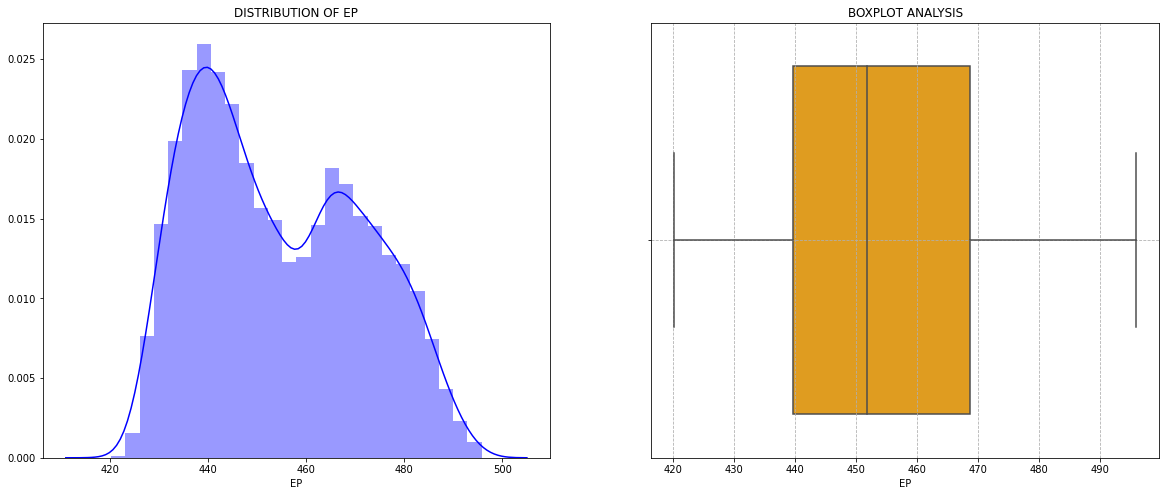

In [4]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 8))

ax[0].set_title('DISTRIBUTION OF EP')
sns.distplot(df['EP'], color = 'blue', ax = ax[0])

ax[1].set_title('BOXPLOT ANALYSIS')
sns.boxplot(df['EP'], color = 'orange', ax = ax[1])
ax[1].grid(ls = '--')

plt.show()

So, We can observe that our **Target Variable(EP) seems to be free of the outliers**.

### **ANALYZING THE SIGNIFICANCE OF EACH FEATURE/COLUMN :**

We are using the **Linear Regression Algorithm** here, and for finding the optimal coeficient/weights, We will be using **Gradient Descent**.

Since, **Linear Regression assumes that the Target Variable is linearly dependent over each feature**, So it's better to look at **Upto what degree/extent is our Target Variable linearly dependent over each of the Predictor Variables**. 

The best way to look at this is to find the **Correlation Coefficient(r)** between each of the Predictor Variables(X) and the Target Variable(Y).  

In [5]:
# Getting the Correlation Matrix for the DataFrame as :

df.corr()                            

,T,V,AP,RH,EP
T,1.000000,0.845382,-0.509115,-0.545312,-0.948457
V,0.845382,1.000000,-0.417346,-0.315595,-0.869620
AP,-0.509115,-0.417346,1.000000,0.101367,0.519887
RH,-0.545312,-0.315595,0.101367,1.000000,0.392988
EP,-0.948457,-0.869620,0.519887,0.392988,1.000000


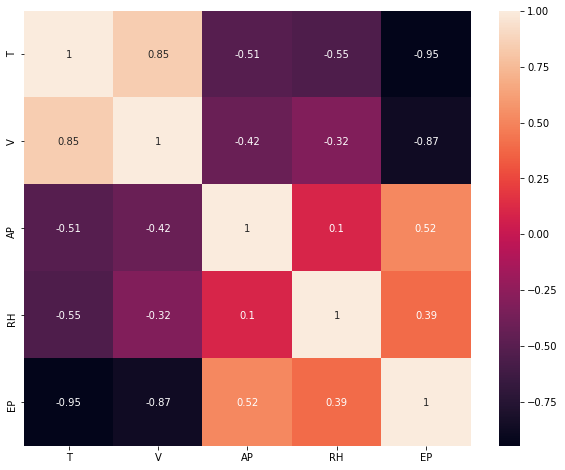

In [6]:
# Drawing a Heat Map for the Correlation Matrix :

fig = plt.figure(figsize = (10,8))

fig.add_subplot(1,1,1)
sns.heatmap(df.corr(), annot = True)    # annot = True, to print the values of the Correlation Coefficients.

plt.show()

In [7]:
# Getting some statistical insights from the numerical columns :
 
df.describe()        

,T,V,AP,RH,EP
count,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000
mean,19.629712,54.288154,1013.263032,73.275818,454.431293
std,7.475256,12.751468,5.964863,14.625093,17.134571
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.470000,41.740000,1009.010000,63.202500,439.737500
50%,20.315000,52.050000,1012.910000,74.895000,451.740000
75%,25.720000,66.540000,1017.302500,84.925000,468.667500
max,35.770000,81.560000,1033.300000,100.160000,495.760000


#### **Temperature (T) :**

A **Very Strong Negative value of Correlation Coefficient(r) exists between T and EP(-0.95)** i.e both the **variables are having a very strong negative co-movement**. 

Hence, **T is an important feature/column for predicting T**.

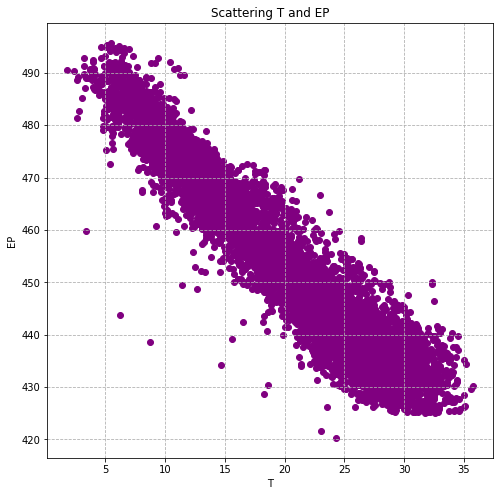

In [8]:
# Scattering T and EP :

fig = plt.figure(figsize = (8,8))
fig.add_subplot(111)

plt.scatter(df['T'], df['EP'], color = 'purple')
plt.xlabel('T')
plt.ylabel('EP')
plt.title('Scattering T and EP')
plt.grid(ls = '--')

plt.show()

A **clear fall/decrease can be observed in EP with the increasing values of T**. 

***EP and T are very strongly related(linearly).***

#### **Exhaust Vacuum (V) :** 

A **Very Strong Negative value of Correlation Coefficient(r) exists between V and EP (-0.87)** i.e both the **variables are having a very strong negative co-movement**.

Hence, **V is also an important feature/column for predicting T**.

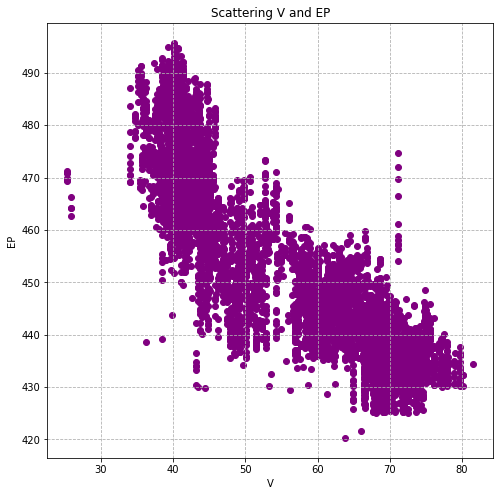

In [9]:
# Scattering V and EP :

fig = plt.figure(figsize = (8,8))
fig.add_subplot(111)

plt.scatter(df['V'], df['EP'], color = 'purple')
plt.xlabel('V')
plt.ylabel('EP')
plt.title('Scattering V and EP')
plt.grid(ls = '--')

plt.show()

We can observe **a decrease in EP with the increasing values of V (negative co-movement)**.

#### **Ambient Pressure (AP) :**

A **Moderate Positive value of Correlation Coefficient(r) exists between AP and EP (0.52)** i.e both the **variables are having a moderate positive co-movement**.

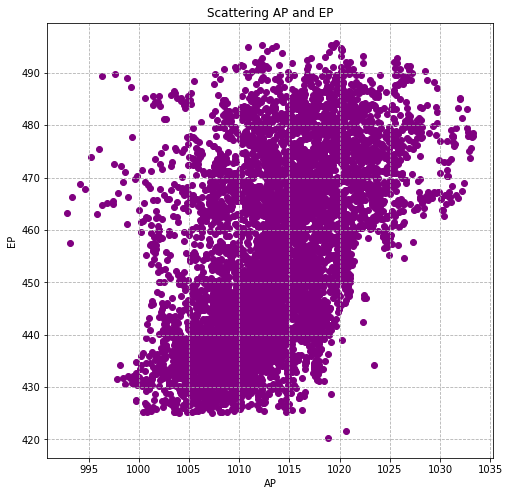

In [10]:
# Scattering AP and EP :

fig = plt.figure(figsize = (8,8))
fig.add_subplot(111)

plt.scatter(df['AP'], df['EP'], color = 'purple')
plt.xlabel('AP')
plt.ylabel('EP')
plt.title('Scattering AP and EP')
plt.grid(ls = '--')

plt.show()

**A rise/increase can be observed in EP with the increasing values of AP(with a few exceptions).**

#### **Relative Humidity (RH) :**

A **Weak Positive value of Correlation Coefficient(r) exists between RH and EP (0.39)** i.e both the **variables are having a weak positive co-movement**.

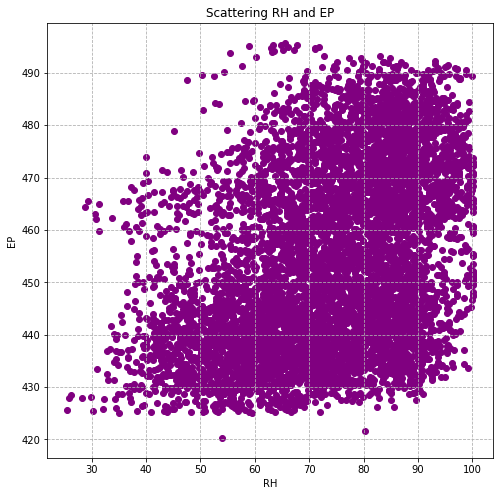

In [11]:
# Scattering RH and EP :

fig = plt.figure(figsize = (8,8))
fig.add_subplot(111)

plt.scatter(df['RH'], df['EP'], color = 'purple')
plt.xlabel('RH')
plt.ylabel('EP')
plt.title('Scattering RH and EP')
plt.grid(ls = '--')

plt.show()

## **GRADIENT DESCENT :**

***Before making the actual predictions on the testing_data, We would split our training_data into 2 parts and will use one for training our model and the other for testing our model***.

And once, We will be satisfied(with the coefficients/weights) with the results, We will combine the 2 parts and will train our model over the entire training_data and use that model to predict for the testing_data.

*Since **the number of training_data points are a bit large in number, So we will use the Mini Batch/ Stochastic Gradient Descent**.*

In [12]:
# Performing the train_test_split :

Y = np.array(df['EP'])                       # OUTPUT/ TARGET VARIABLE/ DEPENDENT VARIABLE .

df.drop('EP', axis = 1, inplace = True)

df.head()

,T,V,AP,RH
0,8.58,38.38,1021.03,84.37
1,21.79,58.20,1017.21,66.74
2,16.64,48.92,1011.55,78.76
3,31.38,71.32,1009.17,60.42
4,9.20,40.03,1017.05,92.46


In [13]:
X = df.values                                 # INPUTS/ PREDICTOR VARIABLES/ INDEPENDENT VARIABLES.

X

array([[   8.58,   38.38, 1021.03,   84.37],
       [  21.79,   58.2 , 1017.21,   66.74],
       [  16.64,   48.92, 1011.55,   78.76],
       ...,
       [  29.8 ,   69.34, 1009.36,   64.74],
       [  16.37,   54.3 , 1017.94,   63.63],
       [  30.11,   62.04, 1010.69,   47.96]])

In [14]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = 0.25, random_state = 0)

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((5382, 4), (5382,), (1794, 4), (1794,))

### **DEFINING ALL THE REQUIRED FUNCTIONS :**

#### **MINI-BATCH GD :**

In [15]:
# A function that takes in the training data(with the all ones Column) and the coefficients array and returns the cost.
def cost(X_train, Y_train, coef_array):
  return ((Y_train - (X_train @ coef_array))**2).mean()


# A function that predicts the Outputs for a given set/array of Inputs. 
def predict(X, coef_array):
  return X @ coef_array


# A function that finds the COD(Coefficient Of Determination).
def score(X, Y, coef_array):
  Y_predicted = predict(X, coef_array)
  u = ((Y - Y_predicted)**2).sum()
  v = ((Y - Y.mean())**2).sum()
  return 1 - (u/v)

# A function to implement the Mini Batch Gradient Descent.
def miniBatchGD(X, Y_train, learning_rate, num_iterations, batch_size = 50, print_cost = False):

  M, N = X.shape
  X_train = X.copy()
  X_train = np.concatenate([X_train, np.ones((len(X_train), 1))], axis = 1)

  np.random.seed(123)
  coef_array = np.random.uniform(-10.0, 10.0, N + 1)
  cost_array = []

  for x in range(num_iterations):
    
    cost_ = cost(X_train, Y_train, coef_array)
    cost_array.append(cost_)
    if print_cost :
      print('Iteration : ' + str(x + 1), '\t', 'Cost : ' + '%.8f'%cost_) 
    slope_array = np.zeros(N + 1)
    for i in range(M):
      f_xi = (coef_array * X_train[i]).sum()
      y_i = Y_train[i]
      for j in range(N + 1):
        slope_array[j] += (-2/M) * (y_i - f_xi) * X_train[i,j]
      if (i != 0 or i % batch_size == 0) or i == M - 1 :
        coef_array -= (learning_rate * slope_array)

  return coef_array, cost_array

##### **USING STANDARDIZATION :**

In [16]:
scaler = preprocessing.StandardScaler()

X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

In [17]:
# Calling the miniBatchGD() function over X_train_standardized and Y_train :

coef_array_standardized,cost_array_standardized=miniBatchGD(X_train_standardized, Y_train, 0.005, 300, print_cost = True)


Iteration : 1 	 Cost : 203015.74346466
Iteration : 2 	 Cost : 53241.01499525
Iteration : 3 	 Cost : 15403.93655096
Iteration : 4 	 Cost : 4964.08861751
Iteration : 5 	 Cost : 1829.97759062
Iteration : 6 	 Cost : 834.77730914
Iteration : 7 	 Cost : 464.95777569
Iteration : 8 	 Cost : 302.92904470
Iteration : 9 	 Cost : 212.70821383
Iteration : 10 	 Cost : 156.52919295
Iteration : 11 	 Cost : 118.30575956
Iteration : 12 	 Cost : 91.95473436
Iteration : 13 	 Cost : 73.36108416
Iteration : 14 	 Cost : 60.24627002
Iteration : 15 	 Cost : 50.86936838
Iteration : 16 	 Cost : 44.14708579
Iteration : 17 	 Cost : 39.26658268
Iteration : 18 	 Cost : 35.70295252
Iteration : 19 	 Cost : 33.06872592
Iteration : 20 	 Cost : 31.10703948
Iteration : 21 	 Cost : 29.62922462
Iteration : 22 	 Cost : 28.50704224
Iteration : 23 	 Cost : 27.64603272
Iteration : 24 	 Cost : 26.98037298
Iteration : 25 	 Cost : 26.46117233
Iteration : 26 	 Cost : 26.05350336
Iteration : 27 	 Cost : 25.73110406
Iteration : 28 	 

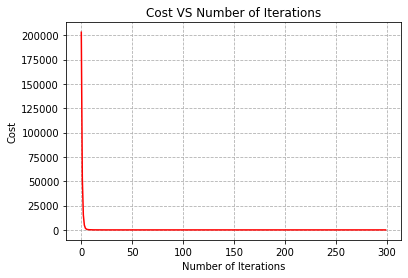

In [18]:
plt.plot(np.arange(len(cost_array_standardized)), cost_array_standardized, color = 'red')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost VS Number of Iterations')
plt.grid(ls = '--')

plt.show()

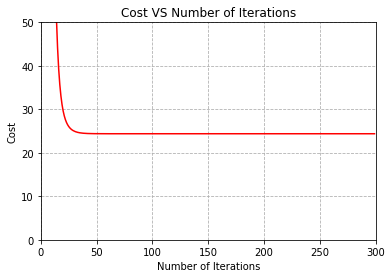

In [19]:
# Zooming-In to the plot :

plt.plot(np.arange(len(cost_array_standardized)), cost_array_standardized, color = 'red')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost VS Number of Iterations')
plt.grid(ls = '--')
plt.axis([0,300,0,50])

plt.show()

***So, We can observe that starting from 2,03,015.74346466, We have minimized the cost to somewhere around 24 within a mere 30 iterations.***


In [20]:
X_test_standardized_1 = np.hstack([X_test_standardized, np.ones((len(X_test_standardized), 1))])

Y_predicted_standardized = predict(X_test_standardized_1, coef_array_standardized)
Y_predicted_standardized

array([427.70493503, 477.78063374, 466.13266217, ..., 443.34875635,
       442.31502769, 431.48907136])

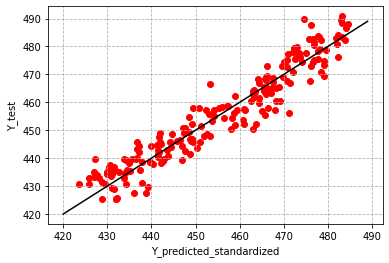

In [21]:
plt.scatter(Y_predicted_standardized[0:200], Y_test[0:200], marker = 'o', color = 'red')
x = np.arange(420,490)
plt.plot(x, x, color = 'black')
plt.xlabel('Y_predicted_standardized')
plt.ylabel('Y_test')
plt.grid(ls = '--')

plt.show()

In [22]:
print('SCORE ON TESTING DATA :',score(X_test_standardized_1, Y_test, coef_array_standardized))

SCORE ON TESTING DATA : 0.9187561671286124


##### **USING NORMALIZATION :**

In [23]:
scaler = preprocessing.MinMaxScaler()

X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [24]:
coef_array_normalized, cost_array_normalized = miniBatchGD(X_train_normalized, Y_train, 0.1, 300, print_cost = True)

Iteration : 1 	 Cost : 204954.50130688
Iteration : 2 	 Cost : 1831.17589384
Iteration : 3 	 Cost : 625.13991565
Iteration : 4 	 Cost : 306.88406502
Iteration : 5 	 Cost : 127.08610190
Iteration : 6 	 Cost : 75.06982874
Iteration : 7 	 Cost : 47.10614792
Iteration : 8 	 Cost : 38.24860070
Iteration : 9 	 Cost : 29.67751828
Iteration : 10 	 Cost : 30.27076775
Iteration : 11 	 Cost : 25.35465185
Iteration : 12 	 Cost : 27.86706254
Iteration : 13 	 Cost : 24.00420116
Iteration : 14 	 Cost : 26.65489937
Iteration : 15 	 Cost : 23.37295430
Iteration : 16 	 Cost : 25.77866255
Iteration : 17 	 Cost : 22.97323877
Iteration : 18 	 Cost : 25.07924345
Iteration : 19 	 Cost : 22.69488646
Iteration : 20 	 Cost : 24.51935391
Iteration : 21 	 Cost : 22.50237874
Iteration : 22 	 Cost : 24.07675811
Iteration : 23 	 Cost : 22.37458090
Iteration : 24 	 Cost : 23.73017874
Iteration : 25 	 Cost : 22.29471234
Iteration : 26 	 Cost : 23.45996851
Iteration : 27 	 Cost : 22.24921007
Iteration : 28 	 Cost : 23.2

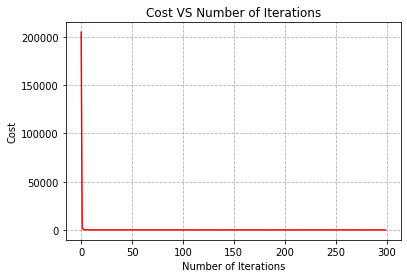

In [25]:
plt.plot(np.arange(len(cost_array_normalized)), cost_array_normalized, color = 'red')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost VS Number of Iterations')
plt.grid(ls = '--')

plt.show()

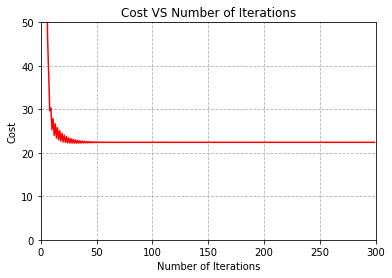

In [26]:
plt.plot(np.arange(len(cost_array_normalized)), cost_array_normalized, color = 'red')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost VS Number of Iterations')
plt.grid(ls = '--')
plt.axis([0,300,0,50])

plt.show()

***So, We can observe that starting from 2,04,954.50130688, We have minimized the cost to somewhere around 22 within a mere 25-30 iterations.***


In [27]:
X_test_normalized_1 = np.hstack([X_test_normalized, np.ones((len(X_test_normalized), 1))])

Y_predicted_normalized = predict(X_test_normalized_1, coef_array_normalized)
Y_predicted_normalized

array([428.60571053, 476.41119319, 467.95003559, ..., 445.74969774,
       445.76148893, 432.98032843])

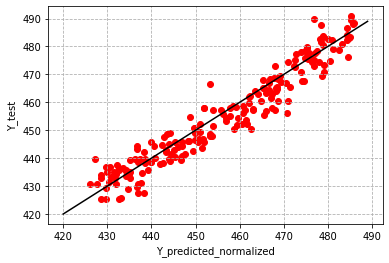

In [28]:
plt.scatter(Y_predicted_normalized[0:200], Y_test[0:200], marker = 'o', color = 'red')
x = np.arange(420,490)
plt.plot(x, x, color = 'black')
plt.xlabel('Y_predicted_normalized')
plt.ylabel('Y_test')
plt.grid(ls = '--')

plt.show()

In [29]:
print('SCORE ON TESTING DATA :',score(X_test_normalized_1, Y_test, coef_array_normalized))

SCORE ON TESTING DATA : 0.9252818779210605


#### **STOCHASTIC GD :**

In [30]:
# A function to implement the Stochastic Gradient Descent.
def stochasticGD(X, Y_train, learning_rate, num_iterations, print_cost = False):

  M, N = X.shape
  X_train = X.copy()
  X_train = np.concatenate([X_train, np.ones((len(X_train), 1))], axis = 1)
  
  np.random.seed(123)
  coef_array = np.random.uniform(-10.0, 10.0, N + 1)
  cost_array = []

  for x in range(num_iterations):
    
    cost_ = cost(X_train, Y_train, coef_array)
    cost_array.append(cost_)
    if print_cost:
      print('Iteration : ' + str(x + 1), '\t', 'Cost : ' + '%.8f'%cost_) 
    slope_array = np.zeros(N + 1)
    for i in range(M):
      f_xi = (coef_array * X_train[i]) .sum()
      y_i = Y_train[i]
      for j in range(N + 1):
        slope_array[j] += (-2/M) * (y_i - f_xi) * X_train[i,j]
      coef_array -= (learning_rate * slope_array)

  return coef_array, cost_array

##### **USING STANDARDIZATION :**

In [31]:
coef_array_standardized, cost_array_standardized = stochasticGD(X_train_standardized, Y_train, 0.0001, 200, True) 

Iteration : 1 	 Cost : 203015.74346466
Iteration : 2 	 Cost : 52485.80825472
Iteration : 3 	 Cost : 13597.98810854
Iteration : 4 	 Cost : 3542.19478613
Iteration : 5 	 Cost : 941.19490276
Iteration : 6 	 Cost : 267.66583715
Iteration : 7 	 Cost : 92.59581088
Iteration : 8 	 Cost : 46.50729904
Iteration : 9 	 Cost : 33.85889585
Iteration : 10 	 Cost : 29.93687336
Iteration : 11 	 Cost : 28.34191526
Iteration : 12 	 Cost : 27.41134610
Iteration : 13 	 Cost : 26.70824985
Iteration : 14 	 Cost : 26.11351376
Iteration : 15 	 Cost : 25.59092988
Iteration : 16 	 Cost : 25.12635323
Iteration : 17 	 Cost : 24.71188549
Iteration : 18 	 Cost : 24.34171579
Iteration : 19 	 Cost : 24.01098726
Iteration : 20 	 Cost : 23.71545484
Iteration : 21 	 Cost : 23.45135481
Iteration : 22 	 Cost : 23.21533471
Iteration : 23 	 Cost : 23.00440342
Iteration : 24 	 Cost : 22.81589045
Iteration : 25 	 Cost : 22.64741068
Iteration : 26 	 Cost : 22.49683346
Iteration : 27 	 Cost : 22.36225521
Iteration : 28 	 Cost :

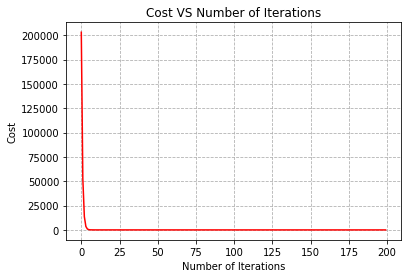

In [32]:
plt.plot(np.arange(len(cost_array_standardized)), cost_array_standardized, color = 'red')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost VS Number of Iterations')
plt.grid(ls = '--')

plt.show()

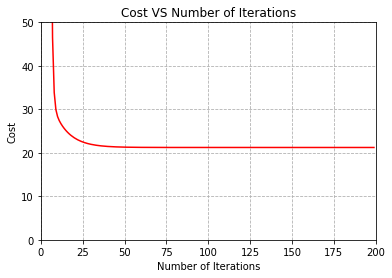

In [33]:
plt.plot(np.arange(len(cost_array_standardized)), cost_array_standardized, color = 'red')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost VS Number of Iterations')
plt.grid(ls = '--')
plt.axis([0,200,0,50])

plt.show()

In [34]:
X_test_standardized_1 = np.hstack([X_test_standardized, np.ones((len(X_test_standardized), 1))])

Y_predicted_standardized = predict(X_test_standardized_1, coef_array_standardized)
Y_predicted_standardized

array([428.28099549, 475.61468266, 466.41957591, ..., 445.97708851,
       445.55876901, 432.09633114])

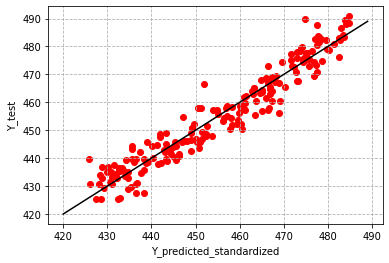

In [35]:
plt.scatter(Y_predicted_standardized[0:200], Y_test[0:200], marker = 'o', color = 'red')
x = np.arange(420,490)
plt.plot(x, x, color = 'black')
plt.xlabel('Y_predicted_standardized')
plt.ylabel('Y_test')
plt.grid(ls = '--')

plt.show()

In [36]:
score(X_test_standardized_1, Y_test, coef_array_standardized)

0.929427966548943

##### **USING NORMALIZATION :**

In [37]:
coef_array_normalized, cost_array_normalized = stochasticGD(X_train_normalized, Y_train, 0.001, 500, True)

Iteration : 1 	 Cost : 204954.50130688
Iteration : 2 	 Cost : 7434.79582204
Iteration : 3 	 Cost : 1226.69881104
Iteration : 4 	 Cost : 873.36863191
Iteration : 5 	 Cost : 755.45154272
Iteration : 6 	 Cost : 670.31411453
Iteration : 7 	 Cost : 601.26804729
Iteration : 8 	 Cost : 543.46587884
Iteration : 9 	 Cost : 494.29448652
Iteration : 10 	 Cost : 451.98399562
Iteration : 11 	 Cost : 415.22733452
Iteration : 12 	 Cost : 383.02556575
Iteration : 13 	 Cost : 354.60207275
Iteration : 14 	 Cost : 329.34580094
Iteration : 15 	 Cost : 306.77082116
Iteration : 16 	 Cost : 286.48667860
Iteration : 17 	 Cost : 268.17637601
Iteration : 18 	 Cost : 251.57990623
Iteration : 19 	 Cost : 236.48186340
Iteration : 20 	 Cost : 222.70206878
Iteration : 21 	 Cost : 210.08843420
Iteration : 22 	 Cost : 198.51149208
Iteration : 23 	 Cost : 187.86017184
Iteration : 24 	 Cost : 178.03851227
Iteration : 25 	 Cost : 168.96308020
Iteration : 26 	 Cost : 160.56092502
Iteration : 27 	 Cost : 152.76794247
Itera

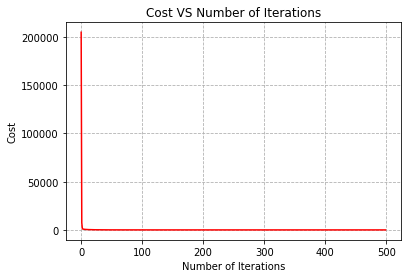

In [38]:
plt.plot(np.arange(len(cost_array_normalized)), cost_array_normalized, color = 'red')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost VS Number of Iterations')
plt.grid(ls = '--')

plt.show()

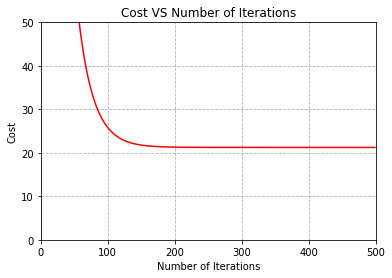

In [39]:
plt.plot(np.arange(len(cost_array_normalized)), cost_array_normalized, color = 'red')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost VS Number of Iterations')
plt.grid(ls = '--')
plt.axis([0,500,0,50])

plt.show()

In [40]:
X_test_normalized_1 = np.hstack([X_test_normalized, np.ones((len(X_test_normalized), 1))])

Y_predicted_normalized = predict(X_test_normalized_1, coef_array_normalized)
Y_predicted_normalized

array([428.36767292, 475.69313082, 466.5184851 , ..., 446.07081526,
       445.66086962, 432.19081908])

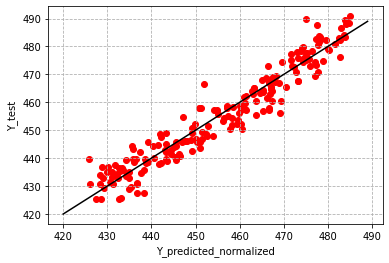

In [41]:
plt.scatter(Y_predicted_normalized[0:200], Y_test[0:200], marker = 'o', color = 'red')
x = np.arange(420,490)
plt.plot(x, x, color = 'black')
plt.xlabel('Y_predicted_normalized')
plt.ylabel('Y_test')
plt.grid(ls = '--')

plt.show()

In [42]:
print('SCORE ON TESTING DATA :',score(X_test_normalized_1, Y_test, coef_array_normalized))

SCORE ON TESTING DATA : 0.9294349418847251


## **MAKING PREDICTIONS :**

In [43]:
# Combining training_data and testing_data as stated above :

X_train = np.concatenate([X_train, X_test])
Y_train = np.concatenate([Y_train, Y_test])

In [44]:
scaler = preprocessing.MinMaxScaler()

X_train_normalized = scaler.fit_transform(X_train)

In [45]:
coef_array_normalized, cost_array_normalized = stochasticGD(X_train_normalized, Y_train, 0.001, 500, True)

Iteration : 1 	 Cost : 204862.02577407
Iteration : 2 	 Cost : 127347.77173046
Iteration : 3 	 Cost : 79960.24531244
Iteration : 4 	 Cost : 50419.63595305
Iteration : 5 	 Cost : 31878.79772930
Iteration : 6 	 Cost : 20209.55803581
Iteration : 7 	 Cost : 12854.85462756
Iteration : 8 	 Cost : 8214.76959829
Iteration : 9 	 Cost : 5284.24570128
Iteration : 10 	 Cost : 3430.87780723
Iteration : 11 	 Cost : 2256.47212611
Iteration : 12 	 Cost : 1510.23327914
Iteration : 13 	 Cost : 1034.17828404
Iteration : 14 	 Cost : 728.77602882
Iteration : 15 	 Cost : 531.30909863
Iteration : 16 	 Cost : 402.24571889
Iteration : 17 	 Cost : 316.65666868
Iteration : 18 	 Cost : 258.80990673
Iteration : 19 	 Cost : 218.76670057
Iteration : 20 	 Cost : 190.23830561
Iteration : 21 	 Cost : 169.23645063
Iteration : 22 	 Cost : 153.22364494
Iteration : 23 	 Cost : 140.57815974
Iteration : 24 	 Cost : 130.25709650
Iteration : 25 	 Cost : 121.58413895
Iteration : 26 	 Cost : 114.11578102
Iteration : 27 	 Cost : 1

In [46]:
# Loading the Testing DataSet :

filePath = '/content/drive/My Drive/ML STUFF/PROJECTS/CCPP/ccpp_test.csv'
testing_data = pd.read_csv(filePath, names = ['T', 'V', 'AP', 'RH'])

df = testing_data.copy()
df.head()

,T,V,AP,RH
0,11.95,42.03,1017.58,90.89
1,12.07,38.25,1012.67,81.66
2,26.91,74.99,1005.64,78.98
3,20.58,39.53,1005.68,62.09
4,16.78,37.20,1011.97,68.94


In [47]:
X_test_normalized = scaler.transform(df.values)

X_test_normalized = np.hstack([X_test_normalized, np.ones((len(X_test_normalized), 1))])

In [48]:
Y_predicted = predict(X_test_normalized, coef_array_normalized)
Y_predicted

array([470.12757346, 471.91141377, 433.86985798, ..., 439.23154456,
       450.81082113, 447.39935721])

In [49]:
filePath = '/content/drive/My Drive/ML STUFF/PROJECTS/CCPP/Y_predicted.csv'

np.savetxt(filePath, Y_predicted, fmt = '%.8f')

## **IMPROVING SCORES :**

**This is the most basic/naive approach for improving the score and should not be used as it might lead to overfitting**.

*These snippets are just to give an idea of the same.*

In [50]:
df = pd.DataFrame(X, columns = ['T', 'V', 'AP', 'RH'])

df.head()

,T,V,AP,RH
0,8.58,38.38,1021.03,84.37
1,21.79,58.20,1017.21,66.74
2,16.64,48.92,1011.55,78.76
3,31.38,71.32,1009.17,60.42
4,9.20,40.03,1017.05,92.46


In [51]:
columns = len(df.columns)

for i in range(columns):
  for j in range(i, columns):
    df[df.columns[i] + '*' + df.columns[j]] = df[df.columns[i]] * df[df.columns[j]]

df.head()

,T,V,AP,RH,T*T,T*V,T*AP,T*RH,V*V,V*AP,V*RH,AP*AP,AP*RH,RH*RH
0,8.58,38.38,1021.03,84.37,73.6164,329.3004,8760.4374,723.8946,1473.0244,39187.1314,3238.1206,1.042502e+06,86144.3011,7118.2969
1,21.79,58.20,1017.21,66.74,474.8041,1268.1780,22165.0059,1454.2646,3387.2400,59201.6220,3884.2680,1.034716e+06,67888.5954,4454.2276
2,16.64,48.92,1011.55,78.76,276.8896,814.0288,16832.1920,1310.5664,2393.1664,49485.0260,3852.9392,1.023233e+06,79669.6780,6203.1376
3,31.38,71.32,1009.17,60.42,984.7044,2238.0216,31667.7546,1895.9796,5086.5424,71974.0044,4309.1544,1.018424e+06,60974.0514,3650.5764
4,9.20,40.03,1017.05,92.46,84.6400,368.2760,9356.8600,850.6320,1602.4009,40712.5115,3701.1738,1.034391e+06,94036.4430,8548.8516


In [52]:
scaler = preprocessing.MinMaxScaler()

X_train_normalized = scaler.fit_transform(df.values)
Y_train = Y

In [53]:
coef_array_normalized, cost_array_normalized = stochasticGD(X_train_normalized, Y_train, 0.001, 1000, True)

Iteration : 1 	 Cost : 208937.56470439
Iteration : 2 	 Cost : 24728.09291318
Iteration : 3 	 Cost : 4198.31134945
Iteration : 4 	 Cost : 1423.95775123
Iteration : 5 	 Cost : 896.47163004
Iteration : 6 	 Cost : 674.32492642
Iteration : 7 	 Cost : 556.53576062
Iteration : 8 	 Cost : 468.09873411
Iteration : 9 	 Cost : 402.89978282
Iteration : 10 	 Cost : 348.63287430
Iteration : 11 	 Cost : 304.46290804
Iteration : 12 	 Cost : 266.73130708
Iteration : 13 	 Cost : 234.94422366
Iteration : 14 	 Cost : 207.59739083
Iteration : 15 	 Cost : 184.23782326
Iteration : 16 	 Cost : 164.08782991
Iteration : 17 	 Cost : 146.76137012
Iteration : 18 	 Cost : 131.78962772
Iteration : 19 	 Cost : 118.86689190
Iteration : 20 	 Cost : 107.68255484
Iteration : 21 	 Cost : 98.00342462
Iteration : 22 	 Cost : 89.61235230
Iteration : 23 	 Cost : 82.33441191
Iteration : 24 	 Cost : 76.01331975
Iteration : 25 	 Cost : 70.51874465
Iteration : 26 	 Cost : 65.73647048
Iteration : 27 	 Cost : 61.56962014
Iteration 

In [54]:
filePath = '/content/drive/My Drive/ML STUFF/PROJECTS/CCPP/ccpp_test.csv'
testing_data = pd.read_csv(filePath, names = ['T', 'V', 'AP', 'RH'])

df = testing_data.copy()

In [55]:
columns = len(df.columns)

for i in range(columns):
  for j in range(i, columns):
    df[df.columns[i] + '*' + df.columns[j]] = df[df.columns[i]] * df[df.columns[j]]

df.head()

,T,V,AP,RH,T*T,T*V,T*AP,T*RH,V*V,V*AP,V*RH,AP*AP,AP*RH,RH*RH
0,11.95,42.03,1017.58,90.89,142.8025,502.2585,12160.0810,1086.1355,1766.5209,42768.8874,3820.1067,1.035469e+06,92487.8462,8260.9921
1,12.07,38.25,1012.67,81.66,145.6849,461.6775,12222.9269,985.6362,1463.0625,38734.6275,3123.4950,1.025501e+06,82694.6322,6668.3556
2,26.91,74.99,1005.64,78.98,724.1481,2017.9809,27061.7724,2125.3518,5623.5001,75412.9436,5922.7102,1.011312e+06,79425.4472,6237.8404
3,20.58,39.53,1005.68,62.09,423.5364,813.5274,20696.8944,1277.8122,1562.6209,39754.5304,2454.4177,1.011392e+06,62442.6712,3855.1681
4,16.78,37.20,1011.97,68.94,281.5684,624.2160,16980.8566,1156.8132,1383.8400,37645.2840,2564.5680,1.024083e+06,69765.2118,4752.7236


In [56]:
X_test_normalized = scaler.transform(df.values)

X_test_normalized = np.hstack([X_test_normalized, np.ones((len(X_test_normalized), 1))])

In [57]:
Y_predicted = predict(X_test_normalized, coef_array_normalized)
Y_predicted

array([470.64114017, 472.532794  , 433.650636  , ..., 436.37850119,
       450.75729863, 445.7959    ])

In [58]:
X_train_normalized_1 = np.hstack([X_train_normalized, np.ones((len(X_train_normalized), 1))])

print('SCORE ON TRAINING DATA :', score(X_train_normalized_1, Y_train, coef_array_normalized))

SCORE ON TRAINING DATA : 0.9347015102456645


In [59]:
filePath = '/content/drive/My Drive/ML STUFF/PROJECTS/CCPP/Y_predicted.csv'

np.savetxt(filePath, Y_predicted, fmt = '%.8f')